Names: McHale Trotter, Kolt Byers

# Modelling Rocket Motion with an Integrator

In this simulation, we will model the motion of a rocket with changing mass due to burning fuel. The rocket burns fuel at a rate of $dm/dt$ where $m$ is the instantaneous mass of the rocket.

If the exhaust velocity is $v_{ex}$, then the thrust on the rocket has a magnitude of

$$F_{thrust} = -\frac{dm}{dt}v_{ex}$$

where $dm/dt$ is negative since the rocket is losing mass. For a rocket in space in 1D, you can model the rocket's motion as:

$$\frac{dx}{dt} = v_x$$

$$\frac{d v_x}{dt} = \frac{F_{thrust,x}}{m}$$


Please feel free to listen to Elton John's Rocket Man while you read about this rocket model:

https://www.youtube.com/watch?v=DtVBCG6ThDk

## Research Questions

1. As a rocket accelerates in space, from rest, it first speeds up and its momentum increases. However, as its mass decreases, eventually the rocket's momentum begins to decrease. For what value of  𝑚  is the rocket's momentum a maximum?


2. If the rocket carries 60% of its initial mass as fuel, what is the rocket's final speed if accelerating from rest in space and if it burns all of its fuel in a single stage?


3. Suppose it burns the fuel in two stages. First it burns 30% of its fuel, then it jettisons the first-stage fuel tank, which has a mass  0.1𝑚0, and then burns the remaining 0.3𝑚0. What is the final speed in this case, assuming the same exhaust velocity and fuel burn rate?

## Predictions

We predict that the rocket that jettisons the fuel tanks will have a greater final velocity than the rocket burning all of the fuel consecutively.

We also predict that second rocket will have a lower final momentum since it will have less mass than the first rocket from dropping two fuel tanks.

## Computational Model

In order to properly model a real rocket, reasonable values for initial mass, fuel burn rate, and exhaust velocity must be used. From our research, we came up with these values to use for the model.

Initial mass: 2,000,000 kg
"The entire shuttle vehicle, fully loaded, weighed about 2 million kg." -NASA.gov

Fuel burn rate: -4989.5 kg/s
"The two solid rocket boosters consume 4989.5 kg of fuel per second."
-NASA.gov

Exhaust velocity: 2571 m/s
"Typical values of exhaust velocity for liquid propellant rockets range from 2000 to 4500 m/s" -history.NASA.gov

In [1]:
import ode
import numpy as np
import matplotlib.pyplot as plt

## Rocket Motion With One Fuel Tank

In [33]:
def rocket(dep, tn):
    x = dep[0]
    v = dep[1]
    m = dep[2]
    
    deriv = np.zeros(3)
    deriv[0] = v
    deriv[1] = thrust/m
    deriv[2] = dmdt

    return deriv
    
x0 = 0 # m
v0 = 0 # m/s
vex = 2571 # m/s
m0 = 2000000 # kg - "The entire shuttle vehicle, fully loaded, weighed about 2 million kg." -NASA.gov
dmdt = -4989.5 # kg - "The two solid rocket boosters consume 4989.5 kg of fuel per second." -NASA.gov
thrust = -dmdt*vex

data = np.array([x0, v0, m0])

#independent variable
t = 0
h = 0.01
Nsteps = int(420/h)

#create arrays needed
tarr = np.zeros(Nsteps)
varr = np.zeros(Nsteps)
marr = np.zeros(Nsteps)
xarr = np.zeros(Nsteps)

tarr[0] = t
varr[0] = 0
marr[0] = m0


for n in range(1, Nsteps):
    
    data = ode.RK4(rocket, data, t, h)
    
    t = t + h
    
    if(data[2] < (m0 - 0.6*m0)):
        dmdt = 0
        thrust = 0

    #store values in arrays
    tarr[n] = t
    xarr[n] = data[0]
    varr[n] = data[1]
    marr[n] = data[2]

    
parr = np.zeros(Nsteps)
parr[0] = 0

for n in range(1, Nsteps):
    parr[n] = marr[n]*varr[n]


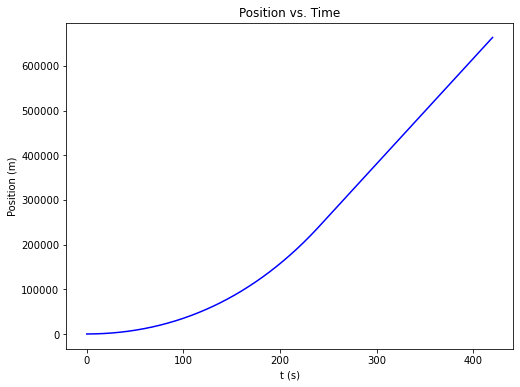

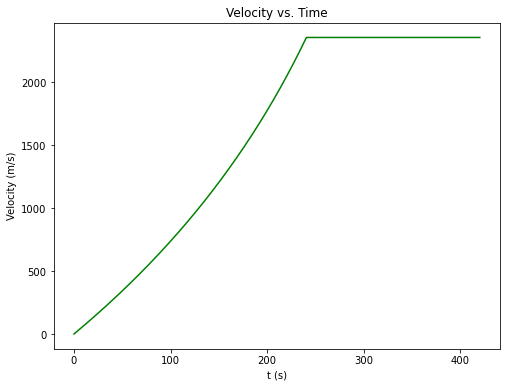

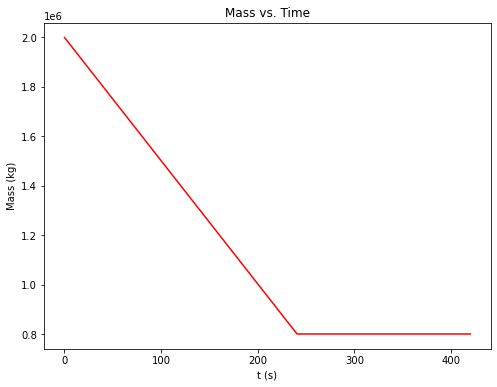

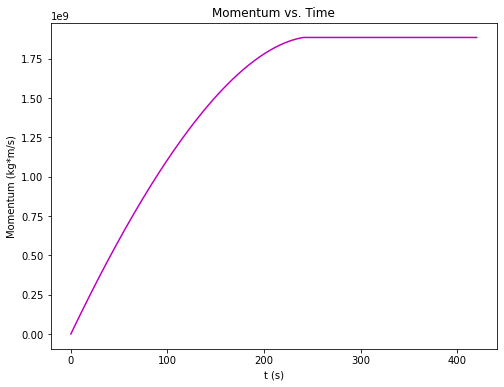

In [34]:
plt.figure(figsize=(8,6))
plt.title("Position vs. Time")
plt.xlabel("t (s)")
plt.ylabel("Position (m)")
plt.plot(tarr, xarr, 'b-')
plt.show()

plt.figure(figsize=(8,6))
plt.title("Velocity vs. Time")
plt.xlabel("t (s)")
plt.ylabel("Velocity (m/s)")
plt.plot(tarr, varr, 'g-')
plt.show()

plt.figure(figsize=(8,6))
plt.title("Mass vs. Time")
plt.xlabel("t (s)")
plt.ylabel("Mass (kg)")
plt.plot(tarr, marr, 'r-')
plt.show()

plt.figure(figsize=(8,6))
plt.title("Momentum vs. Time")
plt.xlabel("t (s)")
plt.ylabel("Momentum (kg*m/s)")
plt.plot(tarr, parr, 'm-')
plt.show()

For what value of 𝑚 is the rocket's momentum a maximum?

In [39]:
pmax = np.where(parr == np.amax(parr))

print(tarr[pmax])

print(marr[pmax])

[240.51 240.52 240.53 ... 419.97 419.98 419.99]
[799975.35499955 799975.35499955 799975.35499955 ... 799975.35499955
 799975.35499955 799975.35499955]


From the code above, you can see that the momentum stays at it's peak from 240.51 seconds and on. This means that the peak momentum exists at a mass of around 800,000 kg after all of the fuel has been used.

If the rocket carries 60% of its initial mass as fuel, what is the rocket's final speed if accelerating from rest in space and if it burns all of its fuel in a single stage?

In [46]:
vfinal = varr[-1]

print(vfinal)

2355.8626757377106


From the code above, you can see that the final velocity of the rocket was 2355.9 m/s.

In [47]:
def rocket(dep, tn):
    x = dep[0]
    v = dep[1]
    m = dep[2]
    
    deriv = np.zeros(3)
    deriv[0] = v
    deriv[1] = thrust/m
    deriv[2] = dmdt

    return deriv
    
x0 = 0 # m
v0 = 0 # m/s
vex = 2571 # m/s
m0 = 2000000 # kg - "The entire shuttle vehicle, fully loaded, weighed about 2 million kg." -NASA.gov
dmdt = -4989.5 # kg - "The two solid rocket boosters consume 4989.5 kg of fuel per second." -NASA.gov
thrust = -dmdt*vex

data = np.array([x0, v0, m0])

#independent variable
t = 0
h = 0.01
Nsteps = int(420/h)

#create arrays needed
t1arr = np.zeros(Nsteps)
v1arr = np.zeros(Nsteps)
m1arr = np.zeros(Nsteps)
x1arr = np.zeros(Nsteps)

t1arr[0] = t
v1arr[0] = 0
m1arr[0] = m0
jettison = 'false'
jettison2 = 'false'

for n in range(1, Nsteps):
    
    data = ode.RK4(rocket, data, t, h)
    
    t = t + h
    
    if(data[2] <= 0.7*m0 and jettison == 'false'):
        data[2] = data[2] - 0.1*m0
        jettison = 'true'
        
    if(data[2] <= 0.3*m0 and jettison2 == 'false'):
        data[2] = data[2] - 0.1*m0
        jettison2 = 'true'
    
    if(data[2] < (m0 - 0.7*m0)):
        dmdt = 0
        thrust = 0

    #store values in arrays
    t1arr[n] = t
    x1arr[n] = data[0]
    v1arr[n] = data[1]
    m1arr[n] = data[2]

    
p1arr = np.zeros(Nsteps)
p1arr[0] = 0

for n in range(1, Nsteps):
    p1arr[n] = m1arr[n]*v1arr[n]

    


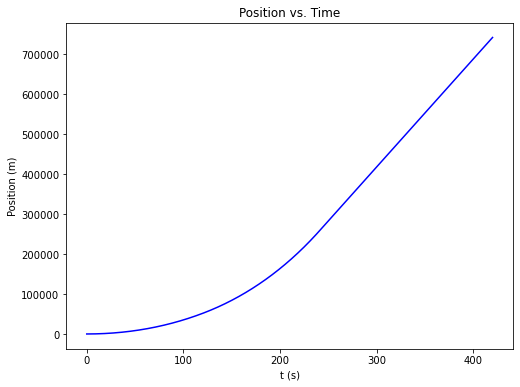

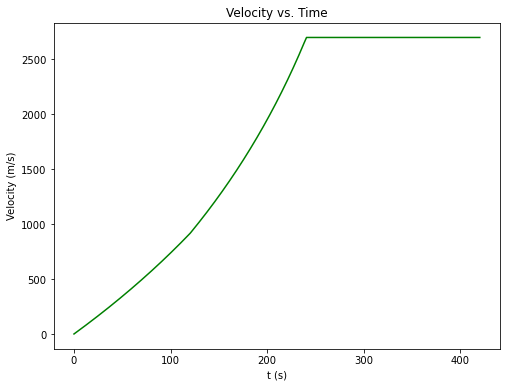

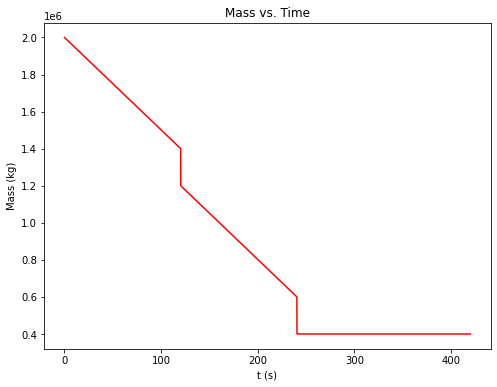

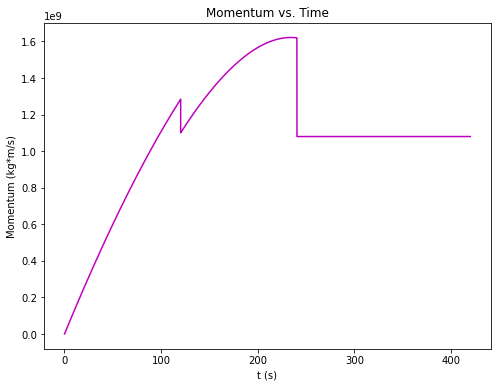

In [48]:
plt.figure(figsize=(8,6))
plt.title("Position vs. Time")
plt.xlabel("t (s)")
plt.ylabel("Position (m)")
plt.plot(t1arr, x1arr, 'b-')
plt.show()

plt.figure(figsize=(8,6))
plt.title("Velocity vs. Time")
plt.xlabel("t (s)")
plt.ylabel("Velocity (m/s)")
plt.plot(t1arr, v1arr, 'g-')
plt.show()

plt.figure(figsize=(8,6))
plt.title("Mass vs. Time")
plt.xlabel("t (s)")
plt.ylabel("Mass (kg)")
plt.plot(tarr, m1arr, 'r-')
plt.show()

plt.figure(figsize=(8,6))
plt.title("Momentum vs. Time")
plt.xlabel("t (s)")
plt.ylabel("Momentum (kg*m/s)")
plt.plot(t1arr, p1arr, 'm-')
plt.show()

For what value of m is the rocket's momentum a maximum?

In [50]:
p1max = np.where(p1arr == np.amax(p1arr))

print(t1arr[p1max])

print(m1arr[p1max])

[234.36]
[630660.77999956]


From the code above, you can see that the rocket had its peak momentum at 234.36 seconds. The momentum peaked when the mass of the rocket was 630,660.8 kg.

Suppose it burns the fuel in two stages. First it burns 30% of its fuel, then it jettisons the first-stage fuel tank, which has a mass 0.1𝑚0, and then burns the remaining 0.3𝑚0. What is the final speed in this case, assuming the same exhaust velocity and fuel burn rate?

In [52]:
vfinal = v1arr[-1]

print(vfinal)

2699.186880469714


In this case, with two fuel jettisons, the rocket's final velocity was 2699.2 m/s, which is greater than the rocket with no fuel jettisons.

## Conclusion

In this project, we simulated two types of rockets with the same mass, exhaust velocity, and fuel burn rate. The first rocket burned all of its fuel consecutively, while the second rocket burned 30%, jettisoned a fuel tank, and then burned another 30% and jettisoned the last fuel tank.


The second rocket's final velocity was greater than the first rocket's final velocity. Also the first rocket's final momentum was greater than the second rocket's final momentum. In general, the results of our model agree with our predictions of final velocity and momentum of the two rockets.